In [69]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
!pwd

/webapps/piglegsurgery/piglegcv


In [38]:
import torch
torch.cuda.is_available()

True

In [39]:
!nvidia-smi

Wed Dec 13 16:12:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   39C    P8     9W / 250W |   2592MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
torch.__version__

'1.12.0a0+8a1a93a'

In [41]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [42]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [12]:
# pip install mmcv-full

# Run whole video processing

In [72]:
outputdir = "./del_test_video_output/"

In [87]:
patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
patch = "*/Einzel.MOV"
patch = "*/*test_4.mp4"
patch = "*/*micro_01*.mp4"
patch = "*/2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"
is_microsurgery = False
test_first_seconds=False

img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(patch))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20231011-191116_2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht_2420162e9b953df5fcaf26ac64f0bd3a7ae78c36/2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4')

In [84]:
# this is to test it on processed video
outputdir = Path("del_test_video_output_copy")
shutil.rmtree(outputdir, ignore_errors=True)
patch = "2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"
img_pths = list(Path("../piglegsurgeryweb/media/").glob(f"**/*{patch}.zip"))
shutil.copytree(str(img_pths[0].parent), str(outputdir))
outputdir = list(outputdir.glob("*/*"))[0].parent
# img_pths[0].parent
# outputdir = Path("/webapps/piglegsurgery/piglegsurgeryweb/media/SA_20231011-191116_doqinglbsdnj").glob("**/*")
# list(outputdir)
outputdir

PosixPath('del_test_video_output_copy/SA_20231011-191116')

# Do it per partes

In [85]:

# pigleg_cv.do_computer_vision(img_pths[0], outputdir , meta=None)
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
# qr_data = dcv.get_parameters_for_crop_rotate_rescale()
# plt.imshow(dcv.frame)
# dcv._make_sure_media_is_cropped()
# dcv.run_image_processing()
# dcv._run_tracking()
# dcv._make_report()
# dcv._save_results()

In [ ]:
dcv._run_tracking()

In [ ]:
dcv._make_report()
dcv._save_results()

### Check the parameters for rotate and crop

2023-10-25 09:05:22.327 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 1672
2023-10-25 09:05:22.863 | DEBUG    | run_qr:get_bboxes:37 - [[          0           0      1063.3      1326.7     0.13618]
 [          0      790.14      1059.4        1920    0.098914]
 [      111.5      1085.8      919.27      1770.7    0.062531]
 [     150.39      187.66      982.93      900.72    0.050687]]
2023-10-25 09:05:23.137 | DEBUG    | run_qr:bbox_info_extraction_from_frame:135 - {'bbox_scene_area': [7.598320484161377,
                     0.4476509690284729,
                     1076.2008056640625,
                     1158.05126953125,
                     0.3550494313240051],
 'box': [],
 'incision_bboxes': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.326684652934122e-05,
 'qr_scissors_frame_detected': False,
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}
2023-10-25 09:05:23,

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-10-25 09:05:23,686 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-10-25 09:05:23.688 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:164 - {'bbox_scene_area': [7.598320484161377,
                     0.4476509690284729,
                     1076.2008056640625,
                     1158.05126953125,
                     0.3550494313240051],
 'box': [],
 'incision_bboxes': [],
 'incision_bboxes_old': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.326684652934122e-05,
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}


{'pix_size_method': 'video size estimation',
 'is_detected': False,
 'box': [],
 'pix_size': 1.0,
 'incision_bboxes': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None,
 'pix_size_single_frame_detector_m': 2.326684652934122e-05,
 'bbox_scene_area': [7.598320484161377,
  0.4476509690284729,
  1076.2008056640625,
  1158.05126953125,
  0.3550494313240051],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'incision_bboxes_old': []}

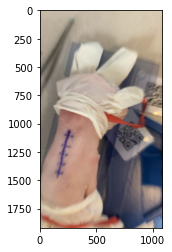

In [149]:

qr_data = dcv.get_parameters_for_crop_rotate_rescale()
plt.imshow(dcv.frame[:,:,::-1])
qr_data

In [ ]:

fn = dcv.do_crop_rotate_rescale(qr_data["bbox_scene_area"], qr_data["incision_bboxes"])
img = pigleg_cv.get_frame_to_process(fn)
plt.imshow(img[:,:,::-1])

In [62]:
Path(outputdir).absolute()

PosixPath('/webapps/piglegsurgery/piglegcv/del_test_video_output')

### Find splits

In [86]:
dcv._load_meta()
dcv._find_stitch_ends_in_tracks(n_clusters=5)

2023-12-14 11:16:49.970 | DEBUG    | run_report:bboxes_to_points:635 - Sort data N=8966
/webapps/piglegsurgery/piglegcv/run_report.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  frame_ids_list = np.asarray(frame_ids).tolist()
2023-12-14 11:16:50.242 | DEBUG    | tools:save_json:15 - Writing 'del_test_video_output_copy/SA_20231011-191116/tracks_points.json'
2023-12-14 11:16:50.244 | DEBUG    | tools:save_json:26 - updated keys: ['frame_ids', 'data_pixels_0', 'data_pixels_1', 'data_pixels_2', 'data_pixels_3']
2023-12-14 11:16:50.332 | DEBUG    | pigleg_cv:find_stitch_ends_in_tracks:369 - find stitch end, pix_size=0.0004894413496104962, fps=30
/home/appuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_i

[546, 1367, 2078, 2882]

## Do whole processing together


In [ ]:
outputdir = "./del_test_video_output/"
# pigleg_cv.do_computer_vision(img_pths[0], outputdir , meta=None)
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
# qr_data = dcv.get_parameters_for_crop_rotate_rescale()
# plt.imshow(dcv.frame)
# qr_data
dcv.run()

2023-12-14 12:13:06.639 | INFO     | pigleg_cv:run:88 - CV processing started on ../piglegsurgeryweb/media/upload/20231011-191116_2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht_2420162e9b953df5fcaf26ac64f0bd3a7ae78c36/2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4, outputdir=del_test_video_output
2023-12-14 12:13:06.641 | DEBUG    | pigleg_cv:run_video_processing:171 - Running video processing...
2023-12-14 12:13:06.662 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 8965
2023-12-14 12:13:06.720 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:226 - device=cuda
2023-12-14 12:13:06.958 | DEBUG    | run_qr:get_bboxes:37 - [[     705.74       387.8      813.28      498.67     0.99424]
 [     286.06      376.03      391.35      479.65     0.99424]
 [     175.67      61.201      1344.3      1053.8     0.15124]
 [     230.59      12.319      1423.5      201.26     0.13009]
 [     251.47      528.07      1425.3      1055.9    0.092554]]
202

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 12:13:07,688 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-14 12:13:07.690 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:237 - {'bbox_scene_area': [186.4540557861328,
                     203.48699951171875,
                     1314.715087890625,
                     1041.72412109375,
                     0.4179236888885498],
 'box': [[708, 399], [718, 495], [810, 486], [801, 390]],
 'incision_bboxes': [[549.2802124023438,
                      875.2634887695312,
                      787.151123046875,
                      942.4053955078125,
                      0.9340460896492004]],
 'incision_bboxes_old': [[546.6876220703125,
                          875.6588745117188,
                          788.8228759765625,
                          942.1117553710938,
                          0.9956039190292358]],
 'is_detected': True,
 'pix_size': 0.00031081825277836804,
 'pix_size_method': 'QR',

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-14 12:13:37,934 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-14 12:13:37.937 | DEBUG    | run_perpendicular:main_perpendicular:294 - len(imgs)=1
2023-12-14 12:13:37.974 | DEBUG    | tools:save_json:15 - Writing 'del_test_video_output/perpendicular_0.json'
2023-12-14 12:13:37.977 | DEBUG    | tools:save_json:24 - old keys: ['intersections', 'alphas']
2023-12-14 12:13:37.978 | DEBUG    | tools:save_json:26 - updated keys: ['intersections', 'alphas']
2023-12-14 12:13:38,226 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - cfg_path=PosixPath('stitch_detection_mmdet_config.py'), True
2023-12-14 12:13:38,227 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - checkpoint_path=PosixPath('/webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth'), True
/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "Defa

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


2023-12-14 12:13:38.710 | DEBUG    | tools:save_json:26 - updated keys: ['stitch_labels', 'stitch_bboxes']
2023-12-14 12:13:38,712 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - number of detected stitches = 4
2023-12-14 12:13:38,712 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - Stitch detection finished, boxes in: del_test_video_output/stitch_detection_0.json
2023-12-14 12:13:38,767 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared upper line: 0.849
2023-12-14 12:13:38,768 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared lower line: 0.872
2023-12-14 12:13:38.915 | DEBUG    | pigleg_cv:run_image_processing:129 - Perpendicular finished.
2023-12-14 12:13:38.917 | DEBUG    | pigleg_cv:run_video_processing:187 - Single frame processing on cropped mediafile finished in 2.1607089042663574s.
2023-12-14 12:13:38.918 | DEBUG    | pigleg_cv:run_video_processing:189 - Image processing finis

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2023-12-14 12:13:42,604 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-12-14 12:13:42,627 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-12-14 12:13:42,628 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-14 12:13:42,628 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-14 12:13:42,862 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, t

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_hands_tools/epoch_2.pth


2023-12-14 12:13:43.756 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 0 by tracker


The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1_1_main_conv_bn_running_var, ema_detector_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_detector_ba

2023-12-14 12:13:54.332 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 50 by tracker
2023-12-14 12:14:05.118 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 100 by tracker
2023-12-14 12:14:15.972 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 150 by tracker
2023-12-14 12:14:26.945 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 200 by tracker
2023-12-14 12:14:37.989 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 250 by tracker
2023-12-14 12:14:49.034 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 300 by tracker
2023-12-14 12:15:00.729 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 350 by tracker
2023-12-14 12:15:11.942 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 400 by tracker
2023-12-14 12:15:23.110 | DEBUG    | run_tracker_

In [ ]:
# report_data = dcv.make_report()